# Noise Reduction using Spectral Gating

Steps of algorithm:

1) data is loaded

2) noise is added to data

3) an FFT is calculated over the noise audio clip

4) statistics are calculated over FFT of the the noise (in frequency)

5) a threshold is calculated based upon the statistics of the noise (and the desired sensitivity of the algorithm)

6) an FFT is calculated over the signal

7) a mask is determined by comparing the signal FFT to the threshold

8) the mask is smoothed with a filter over frequency and time

9) the mask is appled to the FFT of the signal, and is inverted

More about the algorithm is here https://wiki.audacityteam.org/wiki/How_Audacity_Noise_Reduction_Works and here https://timsainburg.com/noise-reduction-python.html and here https://github.com/timsainb/noisereduce

In [ ]:
# !pip install scipy
# !pip install soundfile
# !pip install noisereduce
# !pip install sounddevice

In [11]:
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
import noisereduce as nr
from noisereduce.generate_noise import band_limited_noise
import soundfile as sf

In [13]:
# load data

# data, rate = sf.read('fish.wav')
data, rate = sf.read('eagle.wav')
# data, rate = sf.read('cafe_short.wav')

IPython.display.Audio(data=data, rate=rate)

Text(0, 0.5, 'Amplitude')

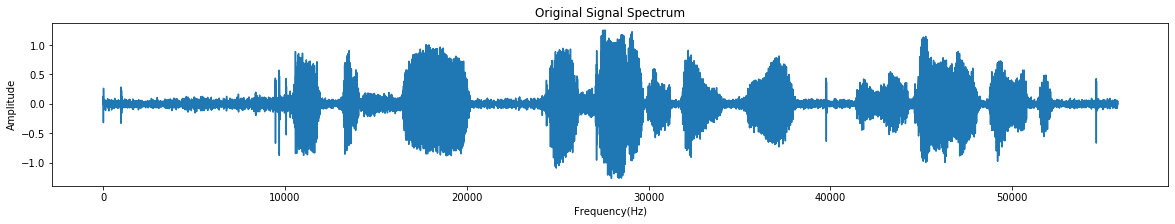

In [14]:
# make frequency plot of initial input signal

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)
plt.title('Original Signal Spectrum')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [15]:
# add noise

noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

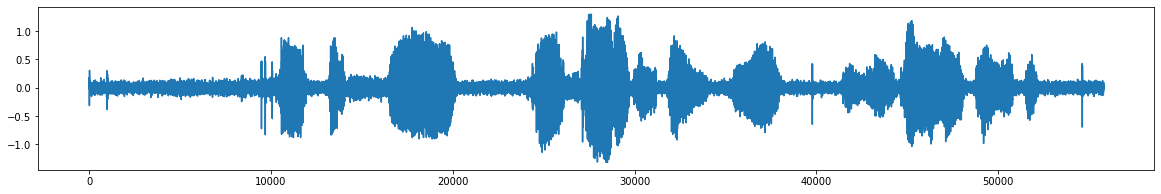

In [16]:
# make frequency plot of noisy audio

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [17]:
# play noisy audio

IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

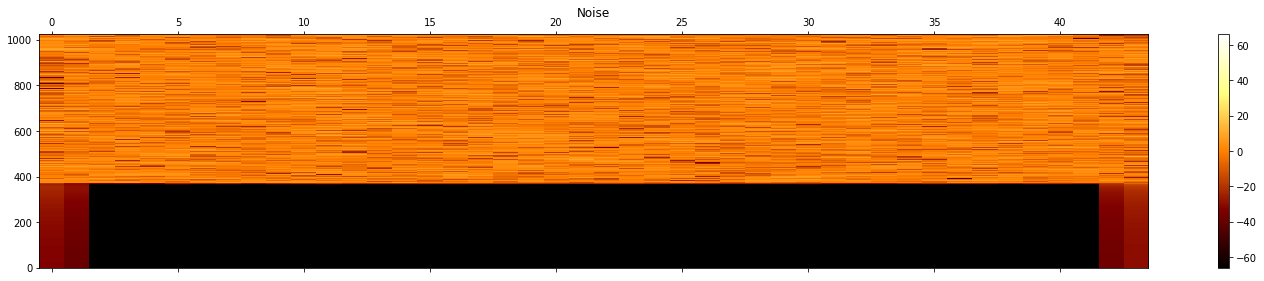

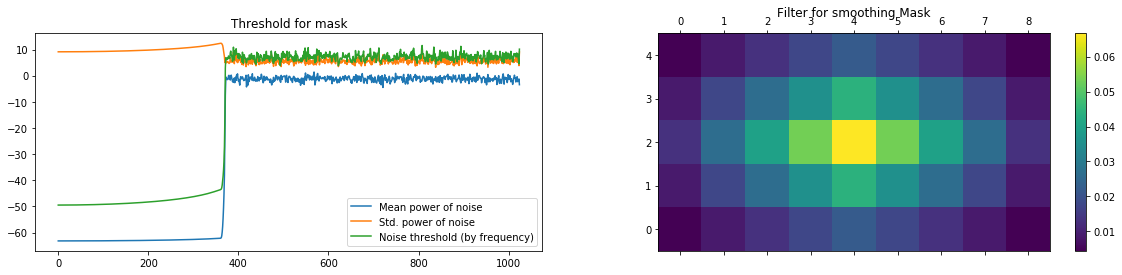

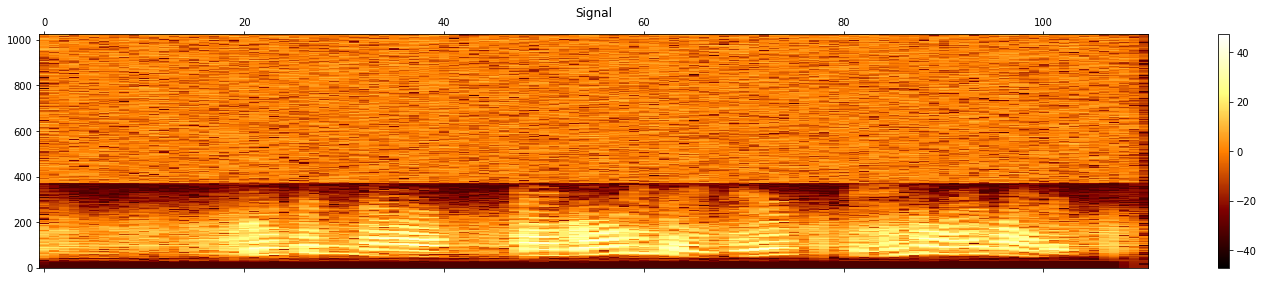

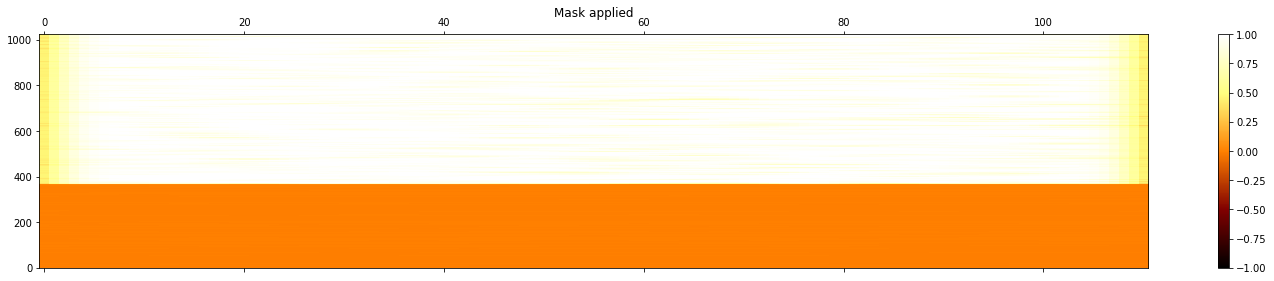

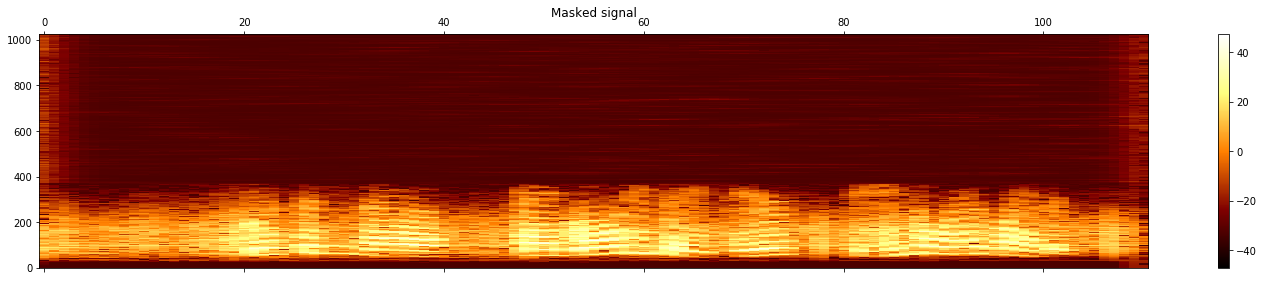

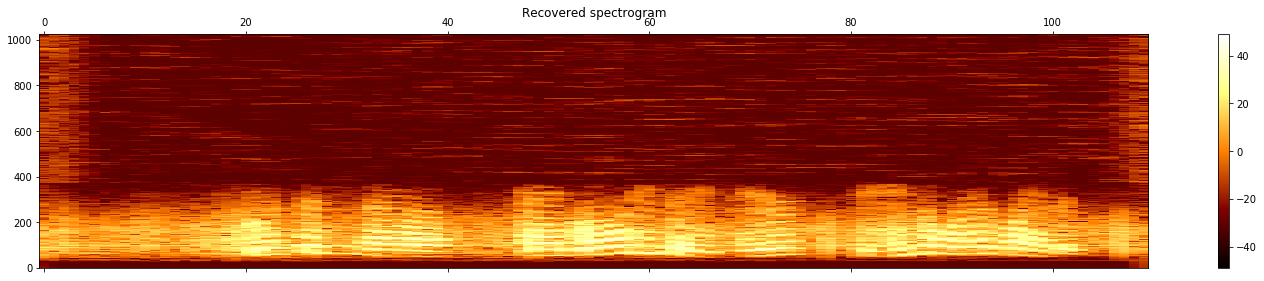

In [18]:
# remove noise

noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, verbose=True)

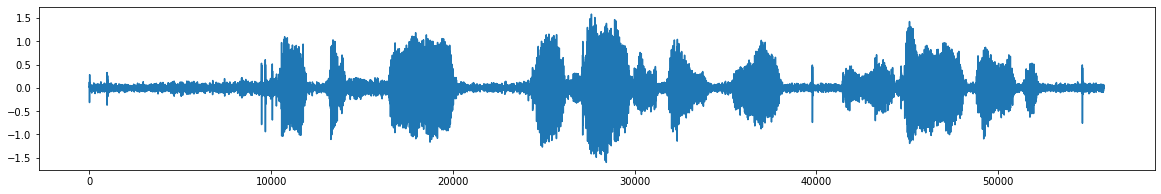

In [19]:
# playback recovered audio 

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [20]:
IPython.display.Audio(data=noise_reduced, rate=rate)